# Progress of the Philippines' Sustainable Development Goals
In 2015, the United Nations General Assembly created 17 interlinked global goals that was intended to be achieved by 2030. It was said that it would pave the way to "a better and more sustainable future for all". The interlinked global goals was named the **Sustainable Development Goals** (SDG).

In this notebook, 27 different datasets from the Philippine Statistics Authority, the government agency assigned to update the Philippine's data on this goals, would be combined. Fifteen (15) of these datasets are directly about the SDG, while others are indirectly connected to the SDGs.

### Import
Import `os`, `math`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`, and `zscore`.
- `os` is a module that allows the usage of operating system dependent functionality
- `numpy` contains a large collection of mathematical functions
- `pandas` is a software library for Python that is designed for data manipulation and data analysis
- `matplotlib.pyplot` contains functions to create interactive plots
- `seaborn` is a library based on matplotlib that allows visualization
- `zscore` allows the computation of the zscore

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

## Exploratory Data Analysis
With the combined dataset, there is a substantial amount of raw data to process and analyze. Before performing any statistical analysis, it is good practice to do exploratory data analysis to observe patterns and detect any outliers in the dataset. With this, we can properly identify particular relationships between specific variables.

As this dataset aims to check the progress of the Sustainable Development Goals of the Philippines, we would be exploring the data per indicator.

In [2]:
supp_data = pd.read_csv('data_output' + '/supplementary_datasets.csv')
supp_data

,Geolocation,Year,Changes in Inventories,Current Health Expenditure GR,Current Health Expenditure,Consumption Expenditure GR,Consumption Expenditure %,Gross Capital Formation,GRDP,Population,Drop-out rate,Price Index for Agriculture
0,PHILIPPINES,2000,-136845782.0,NaN,NaN,5.7,100.0,579938180.0,3.697556e+09,76723051.0,NaN,NaN
1,NCR: National Capital Region,2000,2177317.0,NaN,NaN,8.3,45.9,203930819.0,1.237451e+09,9961971.0,NaN,NaN
2,CAR: Cordillera Administrative Region,2000,-6416286.0,NaN,NaN,2.3,2.7,13865180.0,9.044601e+07,1369249.0,NaN,NaN
3,Region 1: Ilocos Region,2000,-1891391.0,NaN,NaN,1.3,4.0,24454284.0,1.289450e+08,4209083.0,NaN,NaN
4,Region 2: Cagayan Valley,2000,5458610.0,NaN,NaN,4.2,2.4,32773347.0,8.593798e+07,2819641.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
373,Region 10: Northern Mindanao,2020,-1199474.0,NaN,3.4,NaN,4.0,151646358.0,8.615065e+08,5017051.0,NaN,93.0
374,Region 11: Davao Region,2020,-2039156.0,NaN,3.9,NaN,3.6,223994450.0,8.894577e+08,5290869.0,NaN,96.4
375,Region 12: SOCCSKSARGEN,2020,-8700862.0,NaN,3.6,NaN,2.7,76488209.0,4.679055e+08,4378871.0,NaN,89.1
376,CARAGA: Cordillera Administrative Region,2020,-25602975.0,NaN,1.7,NaN,1.9,63204052.0,2.916651e+08,2753109.0,NaN,89.3


### SDG #1: No Poverty

### SDG #3: Good Health and Well-Being

### SDG #4: Quality Education

### SDG #7: Affordable and Clean Energy

To start exploring the 7th SDG, let us load the file using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [3]:
sdg7 = pd.read_csv('data_output' + '/sdg_7.csv')
sdg7

,Geolocation,Year,7.1.1 Proportion of pop with electricity
0,PHILIPPINES,2009,99.39
1,NCR: National Capital Region,2009,100.00
2,CAR: Cordillera Administrative Region,2009,100.00
3,Region 1: Ilocos Region,2009,100.00
4,Region 2: Cagayan Valley,2009,99.96
...,...,...,...
211,Region 10: Northern Mindanao,2020,94.81
212,Region 11: Davao Region,2020,88.40
213,Region 12: SOCCSKSARGEN,2020,85.91
214,CARAGA: Cordillera Administrative Region,2020,100.00


In [4]:
sdg7 ['Year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

<AxesSubplot:>

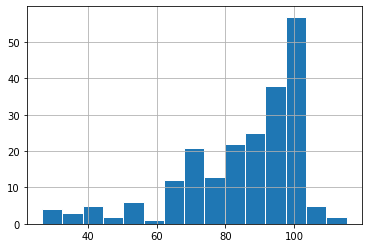

In [5]:
sdg7 ['7.1.1 Proportion of pop with electricity'].hist(bins=15, edgecolor='w')

#### Per region, which year has the lowest `Proportion of the population with access to electricity`?

In [6]:
sdg7.groupby(by = 'Geolocation')['7.1.1 Proportion of pop with electricity']

In [7]:
geolocation_vals = sdg7 ['Geolocation'].unique ()

In [8]:
geolocation_vals = geolocation_vals [1: ]

In [9]:
philippines = sdg7 [sdg7 ['Geolocation'] == 'PHILIPPINES']
philippines

,Geolocation,Year,7.1.1 Proportion of pop with electricity
0,PHILIPPINES,2009,99.390000
18,PHILIPPINES,2010,99.890000
36,PHILIPPINES,2011,70.180812
54,PHILIPPINES,2012,76.694571
72,PHILIPPINES,2013,79.853466
90,PHILIPPINES,2014,80.900000
108,PHILIPPINES,2015,89.620000
126,PHILIPPINES,2016,90.650000
144,PHILIPPINES,2017,91.090000
162,PHILIPPINES,2018,96.120000


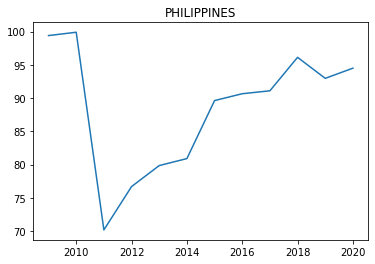

In [10]:
plt.plot(philippines ['Year'], philippines ['7.1.1 Proportion of pop with electricity'])
plt.title('PHILIPPINES')
plt.show()

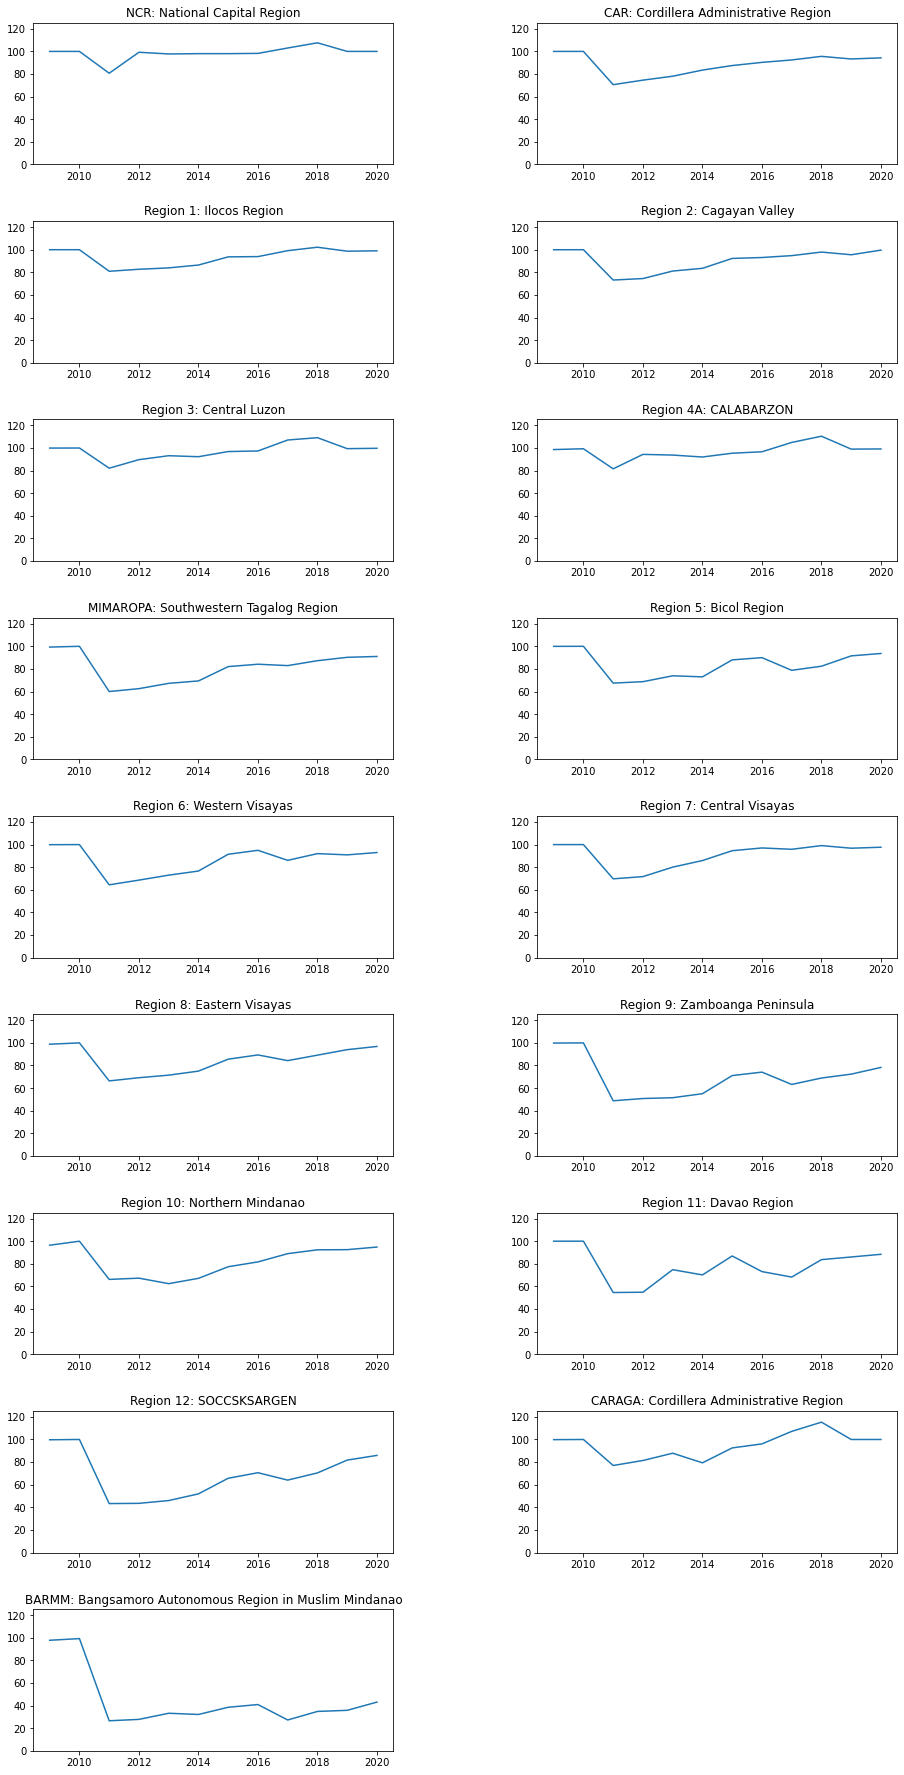

In [11]:
figure, axis = plt.subplots((len (geolocation_vals) + 1) // 2, 2, figsize = (15, 30))
max_ = sdg7['7.1.1 Proportion of pop with electricity'].max()

for axis_ in axis:
    for axis__ in axis_:
        axis__.set_ylim([0, max_ + 10])
    
counter = 0
for i in range ((len (geolocation_vals) + 1) // 2):
    for j in range (2):
        if counter < len(geolocation_vals):
            temp = sdg7 [sdg7 ['Geolocation'] == geolocation_vals [counter]]
            axis[i, j].plot(temp ['Year'], temp['7.1.1 Proportion of pop with electricity'])
            axis[i, j].set_title(geolocation_vals [counter])
            counter = counter + 1
        else:
            plt.delaxes(axis[i, j])
            
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.4, hspace = 0.4)
plt.show()

### SDG #8: Decent Work and Economic Growth
Again, using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function, we load the next SDG.

In [12]:
sdg8 = pd.read_csv('data_output' + '/sdg_8.csv')
sdg8

,Geolocation,Year,8.1.1 Growth rate of real GDP per capita
0,PHILIPPINES,2001,1.007914
1,NCR: National Capital Region,2001,0.841128
2,CAR: Cordillera Administrative Region,2001,1.900838
3,Region 1: Ilocos Region,2001,0.811589
4,Region 2: Cagayan Valley,2001,2.147953
...,...,...,...
356,Region 11: Davao Region,2020,-9.046379
357,Region 12: SOCCSKSARGEN,2020,-5.555509
358,CARAGA: Cordillera Administrative Region,2020,-8.237564
359,BARMM: Bangsamoro Autonomous Region in Muslim ...,2020,-3.881252


In [13]:
sdg8['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [14]:
sdg8['8.1.1 Growth rate of real GDP per capita'].describe()

count    361.000000
mean       3.227028
std        3.829716
min      -15.362293
25%        1.983157
50%        3.951342
75%        5.338761
max       12.694224
Name: 8.1.1 Growth rate of real GDP per capita, dtype: float64

In [15]:
sdg8 [sdg8 ['8.1.1 Growth rate of real GDP per capita'] == sdg8['8.1.1 Growth rate of real GDP per capita'].min()]

,Geolocation,Year,8.1.1 Growth rate of real GDP per capita
347,Region 3: Central Luzon,2020,-15.362293


In [16]:
sdg8 [sdg8['Geolocation'] == 'Region 3: Central Luzon']

,Geolocation,Year,8.1.1 Growth rate of real GDP per capita
5,Region 3: Central Luzon,2001,3.600192
23,Region 3: Central Luzon,2002,3.351012
41,Region 3: Central Luzon,2003,2.107589
59,Region 3: Central Luzon,2004,0.962747
77,Region 3: Central Luzon,2005,1.725320
95,Region 3: Central Luzon,2006,2.538984
113,Region 3: Central Luzon,2007,3.720296
131,Region 3: Central Luzon,2008,3.033030
149,Region 3: Central Luzon,2009,-1.347883
167,Region 3: Central Luzon,2010,7.861806


### SDG #10: Reduced Inequalities

### SDG #14: Life Below Water

### SDG #16: Peace, Justice and Strong Institutions

### Exploring all of the Datasets

In [17]:
data = pd.read_csv('data_output' + '/combined_data.csv')
data

,Geolocation,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net JHS Enrolment Rate,1.4.1 Net SHS Enrolment Rate,1.5.4 Proportion of LGU with DRR,3.4.1 Mortality rate creditted to NCD,3.7.1 Proportion of Contraceptive Use of Women,3.7.2 Teenage pregnancy rates per 1000,...,Changes in Inventories,Current Health Expenditure GR,Current Health Expenditure,Consumption Expenditure GR,Consumption Expenditure %,Gross Capital Formation,GRDP,Population,Drop-out rate,Price Index for Agriculture
0,PHILIPPINES,2000,NaN,96.77,66.06,NaN,NaN,NaN,NaN,NaN,...,-136845782.0,NaN,NaN,5.7,100.0,579938180.0,3.697556e+09,76723051.0,NaN,NaN
1,NCR: National Capital Region,2000,NaN,101.00,79.05,NaN,NaN,NaN,NaN,NaN,...,2177317.0,NaN,NaN,8.3,45.9,203930819.0,1.237451e+09,9961971.0,NaN,NaN
2,CAR: Cordillera Administrative Region,2000,NaN,94.42,71.19,NaN,NaN,NaN,NaN,NaN,...,-6416286.0,NaN,NaN,2.3,2.7,13865180.0,9.044601e+07,1369249.0,NaN,NaN
3,Region 1: Ilocos Region,2000,NaN,97.73,87.51,NaN,NaN,NaN,NaN,NaN,...,-1891391.0,NaN,NaN,1.3,4.0,24454284.0,1.289450e+08,4209083.0,NaN,NaN
4,Region 2: Cagayan Valley,2000,NaN,95.65,77.11,NaN,NaN,NaN,NaN,NaN,...,5458610.0,NaN,NaN,4.2,2.4,32773347.0,8.593798e+07,2819641.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Region 10: Northern Mindanao,2021,NaN,NaN,NaN,NaN,96.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,Region 11: Davao Region,2021,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,Region 12: SOCCSKSARGEN,2021,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,CARAGA: Cordillera Administrative Region,2021,NaN,NaN,NaN,NaN,93.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.corr()

,Year,1.2.1 Poverty Proportion,1.4.1 Net Elem Enrolment Rate,1.4.1 Net JHS Enrolment Rate,1.4.1 Net SHS Enrolment Rate,1.5.4 Proportion of LGU with DRR,3.4.1 Mortality rate creditted to NCD,3.7.1 Proportion of Contraceptive Use of Women,3.7.2 Teenage pregnancy rates per 1000,4.1 Elem Completion Rate,...,Changes in Inventories,Current Health Expenditure GR,Current Health Expenditure,Consumption Expenditure GR,Consumption Expenditure %,Gross Capital Formation,GRDP,Population,Drop-out rate,Price Index for Agriculture
Year,1.000000,-0.271046,0.329635,0.539846,0.315788,0.085824,0.182169,0.447175,-0.164637,0.614305,...,-0.153005,0.131465,-0.000467,0.301333,0.000026,0.227682,0.205479,0.053402,-0.301962,-0.665519
1.2.1 Poverty Proportion,-0.271046,1.000000,-0.583212,-0.885800,-0.962334,-0.434718,-0.820745,NaN,NaN,-0.668419,...,0.208923,-0.112565,-0.477029,0.118393,-0.231878,-0.271796,-0.267035,-0.162476,0.662477,NaN
1.4.1 Net Elem Enrolment Rate,0.329635,-0.583212,1.000000,0.541017,0.443026,0.275030,0.401520,0.195928,-0.110588,0.372349,...,0.032103,-0.219622,0.146909,0.139525,0.083555,0.143183,0.135676,0.074510,-0.271059,0.130599
1.4.1 Net JHS Enrolment Rate,0.539846,-0.885800,0.541017,1.000000,0.904283,0.309092,0.793448,0.554526,-0.253015,0.846717,...,-0.172205,-0.100037,0.295945,0.081924,0.160036,0.266388,0.256206,0.125587,-0.818358,-0.218417
1.4.1 Net SHS Enrolment Rate,0.315788,-0.962334,0.443026,0.904283,1.000000,0.226513,0.782752,0.328737,-0.336666,0.573764,...,-0.151260,-0.108540,0.400862,-0.024727,0.179368,0.206940,0.203865,0.115139,NaN,-0.255694
1.5.4 Proportion of LGU with DRR,0.085824,-0.434718,0.275030,0.309092,0.226513,1.000000,0.463778,NaN,NaN,0.208580,...,-0.065413,0.112007,-0.116257,0.068319,-0.117204,-0.019267,0.003569,0.014813,NaN,0.032862
3.4.1 Mortality rate creditted to NCD,0.182169,-0.820745,0.401520,0.793448,0.782752,0.463778,1.000000,0.506956,-0.085125,0.726743,...,-0.125842,-0.155968,0.408205,-0.061962,0.222175,0.241675,0.248329,0.183306,-0.866790,-0.129964
3.7.1 Proportion of Contraceptive Use of Women,0.447175,NaN,0.195928,0.554526,0.328737,NaN,0.506956,1.000000,0.054468,0.629730,...,0.053295,-0.406080,-0.040380,0.259256,-0.009148,0.097008,0.076347,-0.001522,-0.519159,NaN
3.7.2 Teenage pregnancy rates per 1000,-0.164637,NaN,-0.110588,-0.253015,-0.336666,NaN,-0.085125,0.054468,1.000000,-0.182124,...,-0.070112,-0.053803,-0.246476,-0.225653,-0.207396,-0.192522,-0.186504,-0.125715,0.099582,NaN
4.1 Elem Completion Rate,0.614305,-0.668419,0.372349,0.846717,0.573764,0.208580,0.726743,0.629730,-0.182124,1.000000,...,-0.068754,-0.061096,0.050531,0.110306,0.067364,0.211126,0.186631,0.082335,-0.988986,0.034686


## References